In [7]:
# data for max_uv vs iteration plot
import pickle
import matplotlib.pyplot as plt
from botorch.acquisition import UpperConfidenceBound
import argparse
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import time
import torch
import uuid

plt.rcParams["font.family"] = "arial"

def get_max_stat(log_seed):
    max_uv_all = []
    for i in range(len(log_seed)):
        df = pd.DataFrame((log_seed[i]))
        df.columns =['yb_1', 'er_1', 'yb_2', 'er_2','radius','UV']
        evalued = len(df)
        max_uv = []
        y = df.UV
        for i in range(evalued):
            max_uv.append(df.iloc[0:i+1].UV.max())

        max_uv_all.append(max_uv)
    y = np.mean(max_uv_all,axis=0)
    std = np.std(max_uv_all,axis=0)
    stderr = std/np.sqrt(len(max_uv_all))
    x = range(len(max_uv))
    return x,y,stderr

# data for count of top uv vs iteration plot
def get_top_stat(log_seed):
    top_count_all = []
    for i in range(len(log_seed)):
        df = pd.DataFrame((log_seed[i]))
        df.columns =['yb_1', 'er_1', 'yb_2', 'er_2','radius','UV']
        evalued = len(df)
        top_count = []
        y = df.UV
        for i in range(evalued):
            df_i = df.iloc[0:i+1]
            top_count.append(len(df_i[df_i['UV']>=3000]))
        top_count_all.append(top_count)

    y = np.mean(top_count_all,axis=0)
    std = np.std(top_count_all,axis=0)
    stderr = std/np.sqrt(len(top_count_all))
    x = range(len(top_count))
    return x, y, stderr



<Figure size 432x288 with 0 Axes>

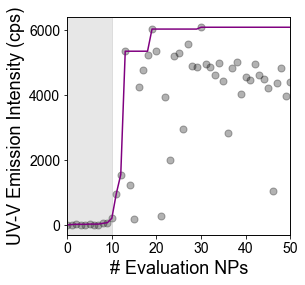

iterations to the max UV: 109.0+/-0.0


In [8]:
def add_one_ensemble(log_seed,i):
    df = pd.DataFrame((log_seed[i][1:]))
    df.columns =['yb_1', 'er_1', 'yb_2', 'er_2','radius','UV']

    evalued = len(df)
    max_uv = []
    y = df.UV
    for i in range(evalued):
        max_uv.append(df.iloc[0:i+1].UV.max())
    x = range(len(max_uv))
    max_x = len(max_uv)
    max_y = max(max_uv)    
    ax1.scatter(x, y, c='black', s=50, alpha = 0.3)
    ax2.plot(x, max_uv, c='purple', alpha = 1)
    return max_x, max_y

log_seed = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_UCB_beta=5_init_included.pkl", "rb" ) )

import matplotlib.pyplot as plt
from botorch.acquisition import UpperConfidenceBound

FontSize = 18
ticksize = 14

plt.figure(1)
fig, ax1 = plt.subplots(figsize=(4, 4))
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.locator_params(axis='y', nbins=4)
ax2 = ax1.twinx()

max_x = 0
max_y = 0
steps = []
UVs=[]
for i in [6]:
#for i in range(len(log_seed)):
    max_xi, max_yi = add_one_ensemble(log_seed,i)
    steps.append(max_xi)
    UVs.append(max_yi)
    max_x = max(max_xi,max_x)
    max_y = max(max_yi,max_y)


ax1.set_ylim(-max_y*0.05,max_y*1.05)
#ax2.set_ylim(-max_y*0.05,max_y*1.05)
ax1.set_xlabel('# Evaluation NPs', fontsize = FontSize)
ax1.set_ylabel('UV-V Emission Intensity (cps)', fontsize = FontSize)
#ax2.set_ylabel('Max UV Intensity Acquired (cps)', color='purple', fontsize = FontSize)
#plt.setp(ax2.get_yticklabels(), color="purple")
# plt.axvspan(x[0]-x[-1]*0.05, 9.5, color='#00A1FF', alpha=0.19)
# plt.axvspan(9.5, x[-1]+x[-1]*0.05, color='#F8CF6A', alpha=0.19)
plt.xlim([0,50])
plt.axvspan(0, 10, color='grey', alpha=0.19)    
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
ax2.set_yticks([])
plt.locator_params(axis='y', nbins=4)
#plt.savefig('pool_max_uv_steps_new_square.pdf', bbox_inches = 'tight') 
plt.show()
print(f'iterations to the max UV: {np.mean(steps)}+/-{np.std(steps)}')

<Figure size 432x288 with 0 Axes>

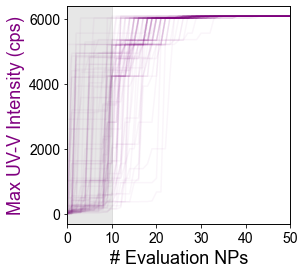

iterations to the max UV: 109.0+/-0.0


In [9]:
log_seed = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_UCB_beta=5_init_included.pkl", "rb" ) )

import matplotlib.pyplot as plt
from botorch.acquisition import UpperConfidenceBound

FontSize = 18
ticksize = 14

plt.figure(1)
fig, ax1 = plt.subplots(figsize=(4, 4))
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.locator_params(axis='y', nbins=4)
ax2 = ax1.twinx()

max_x = 0
max_y = 0
steps = []
UVs=[]

def plot_uv_ensemble(log_seed,i):
    df = pd.DataFrame((log_seed[i][1:]))
    df.columns =['yb_1', 'er_1', 'yb_2', 'er_2','radius','UV']

    evalued = len(df)
    max_uv = []
    y = df.UV
    for i in range(evalued):
        max_uv.append(df.iloc[0:i+1].UV.max())
    x = range(len(max_uv))
    max_x = len(max_uv)
    max_y = max(max_uv)    
    #ax1.scatter(x, y, c='black', alpha = 0.3)
    ax1.plot(x, max_uv, c='purple', alpha = 0.04)
    return max_x, max_y

#for i in [4]:
for i in range(len(log_seed)):
    max_xi, max_yi = plot_uv_ensemble(log_seed,i)
    steps.append(max_xi)
    UVs.append(max_yi)
    max_x = max(max_xi,max_x)
    max_y = max(max_yi,max_y)

x,y,stderr = get_max_stat(log_seed)
#plt.plot(x,y,c='purple',label='log GPR')
#plt.fill_between(x, y-stderr, y+stderr, color='purple',alpha=0.4)

ax1.set_ylim(-max_y*0.05,max_y*1.05)
ax2.set_ylim(-max_y*0.05,max_y*1.05)
ax1.set_xlabel('# Evaluation NPs', fontsize = FontSize)
ax1.set_ylabel('Max UV-V Intensity (cps)', color='purple', fontsize = FontSize)
#ax2.set_ylabel('Max UV Intensity Acquired (cps)', color='purple', fontsize = FontSize)
plt.setp(ax2.get_yticklabels(), color="purple")
## plt.axvspan(x[0]-x[-1]*0.05, 9.5, color='#00A1FF', alpha=0.19)
# plt.axvspan(9.5, x[-1]+x[-1]*0.05, color='#F8CF6A', alpha=0.19)
plt.xlim([0,50])
plt.axvspan(0, 10, color='grey', alpha=0.19)    
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.locator_params(axis='y', nbins=4)
#ax1.set_yticklabels([])
ax2.set_yticks([])
plt.savefig('pool_max_uv_average_new_square_noAvg.pdf', bbox_inches = 'tight') 
plt.show()
print(f'iterations to the max UV: {np.mean(steps)}+/-{np.std(steps)}')

<Figure size 432x288 with 0 Axes>

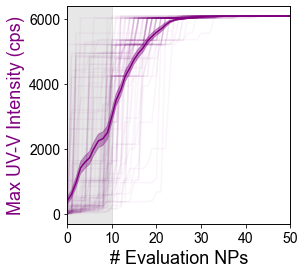

iterations to the max UV: 109.0+/-0.0


In [3]:
log_seed = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_UCB_beta=5_init_included.pkl", "rb" ) )

import matplotlib.pyplot as plt
from botorch.acquisition import UpperConfidenceBound

FontSize = 18
ticksize = 14

plt.figure(1)
fig, ax1 = plt.subplots(figsize=(4, 4))
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.locator_params(axis='y', nbins=4)
ax2 = ax1.twinx()

max_x = 0
max_y = 0
steps = []
UVs=[]

def plot_uv_ensemble(log_seed,i):
    df = pd.DataFrame((log_seed[i][1:]))
    df.columns =['yb_1', 'er_1', 'yb_2', 'er_2','radius','UV']

    evalued = len(df)
    max_uv = []
    y = df.UV
    for i in range(evalued):
        max_uv.append(df.iloc[0:i+1].UV.max())
    x = range(len(max_uv))
    max_x = len(max_uv)
    max_y = max(max_uv)    
    #ax1.scatter(x, y, c='black', alpha = 0.3)
    ax1.plot(x, max_uv, c='purple', alpha = 0.04)
    return max_x, max_y

#for i in [4]:
for i in range(len(log_seed)):
    max_xi, max_yi = plot_uv_ensemble(log_seed,i)
    steps.append(max_xi)
    UVs.append(max_yi)
    max_x = max(max_xi,max_x)
    max_y = max(max_yi,max_y)

x,y,stderr = get_max_stat(log_seed)
plt.plot(x,y,c='purple',label='log GPR')
plt.fill_between(x, y-stderr, y+stderr, color='purple',alpha=0.4)

ax1.set_ylim(-max_y*0.05,max_y*1.05)
ax2.set_ylim(-max_y*0.05,max_y*1.05)
ax1.set_xlabel('# Evaluation NPs', fontsize = FontSize)
ax1.set_ylabel('Max UV-V Intensity (cps)', color='purple', fontsize = FontSize)
#ax2.set_ylabel('Max UV Intensity Acquired (cps)', color='purple', fontsize = FontSize)
plt.setp(ax2.get_yticklabels(), color="purple")
## plt.axvspan(x[0]-x[-1]*0.05, 9.5, color='#00A1FF', alpha=0.19)
# plt.axvspan(9.5, x[-1]+x[-1]*0.05, color='#F8CF6A', alpha=0.19)
plt.xlim([0,50])
plt.axvspan(0, 10, color='grey', alpha=0.19)    
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.locator_params(axis='y', nbins=4)
#ax1.set_yticklabels([])
ax2.set_yticks([])
plt.savefig('pool_max_uv_average_new_square.pdf', bbox_inches = 'tight') 
plt.show()
print(f'iterations to the max UV: {np.mean(steps)}+/-{np.std(steps)}')

<Figure size 432x288 with 0 Axes>

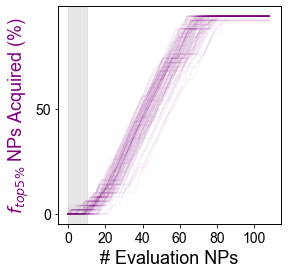

iterations to the max UV: 109.0+/-0.0


In [6]:
log_seed = pickle.load( open( "../saved_data/new_100iters_10inits_100trials_logEmission_UCB_beta=5_init_included.pkl", "rb" ) )

import matplotlib.pyplot as plt
from botorch.acquisition import UpperConfidenceBound

FontSize = 18
ticksize = 14

plt.figure(1)
fig, ax1 = plt.subplots(figsize=(4, 4))
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.locator_params(axis='y', nbins=4)
ax2 = ax1.twinx()

max_x = 0
max_y = 0
steps = []
UVs=[]

def plot_uv_frac_ensemble(log_seed,i):
    df = pd.DataFrame((log_seed[i][1:]))
    df.columns =['yb_1', 'er_1', 'yb_2', 'er_2','radius','UV']

    evalued = len(df)
    top_frac = []
    y = df.UV
    for i in range(evalued):
        df_i = df.iloc[0:i+1]
        top_frac.append(len(df_i[df_i['UV']>=3000])/50*100)
    x = range(len(top_frac))
    max_x = len(top_frac)
    max_y = max(top_frac)    
    #ax1.scatter(x, y, c='black', alpha = 0.3)
    ax1.plot(x, top_frac, c='purple', alpha = 0.04)
    return max_x, max_y

#for i in [4]:
for i in range(len(log_seed)):
    max_xi, max_yi = plot_uv_frac_ensemble(log_seed,i)
    steps.append(max_xi)
    UVs.append(max_yi)
    max_x = max(max_xi,max_x)
    max_y = max(max_yi,max_y)

x,y,stderr = get_max_stat(log_seed)
plt.plot(x,y,c='purple',label='log GPR')
plt.fill_between(x, y-stderr, y+stderr, color='purple',alpha=0.4)

ax1.set_ylim(-max_y*0.05,max_y*1.05)
ax2.set_ylim(-max_y*0.05,max_y*1.05)
ax1.set_xlabel('# Evaluation NPs', fontsize = FontSize)
ax1.set_ylabel('$f_{top5\%}$ NPs Acquired (%)', color='purple', fontsize = FontSize)
#ax2.set_ylabel('Max UV Intensity Acquired (cps)', color='purple', fontsize = FontSize)
plt.setp(ax2.get_yticklabels(), color="purple")
## plt.axvspan(x[0]-x[-1]*0.05, 9.5, color='#00A1FF', alpha=0.19)
# plt.axvspan(9.5, x[-1]+x[-1]*0.05, color='#F8CF6A', alpha=0.19)
#plt.xlim([0,50])
plt.axvspan(0, 10, color='grey', alpha=0.19)    
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.locator_params(axis='y', nbins=4)
#ax1.set_yticklabels([])
ax2.set_yticks([])
plt.savefig('pool_top_uv_frac_average_new_square.pdf', bbox_inches = 'tight') 
plt.show()
print(f'iterations to the max UV: {np.mean(steps)}+/-{np.std(steps)}')